## <font color='green'>Linear Regression with Python Scikit Learn</font>

In this task we'll explore Scikit-Learn, a python library for machine learning to implement regression functions with only two variables.

let's import all the necessary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In this regression task we'll predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Exploratory Data Analysis

let's load our dataset and print 10 random samples from it

In [10]:
url = "http://bit.ly/w-data"
data_set = pd.read_csv(url)
data_set.sample(10)

,Hours,Scores
3,8.5,75
12,4.5,41
14,1.1,17
24,7.8,86
17,1.9,24
13,3.3,42
18,6.1,67
8,8.3,81
21,4.8,54
16,2.5,30


let's explore our data points visually and see if there's any linear relationship between our feauters.Here we'll be using matplotlib library

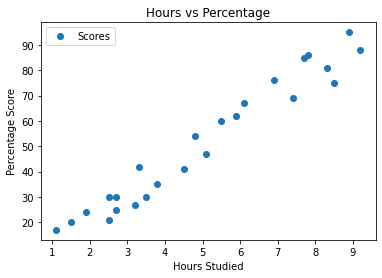

In [11]:
data_set.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

It's clear from the above plot that there's a linear relationship between features 'Hours Studied' and 'Percentage Score'

### Data Preparation

let's separate the input features and the output feature from our dataset

In [12]:
X = data_set.iloc[:, :-1].values
y = data_set.iloc[:, 1].values

Now that we've our input and output features, let's split our data into training and test sets for model training and evaluating purpose

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.1, random_state=0)

### Training the Model

We've our train and test set, Now it's finally the time to train our model

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

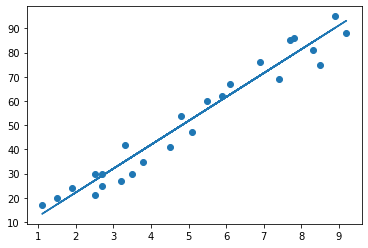

In [15]:
# plotting the regression line
line = lr.coef_ * X + lr.intercept_

# plot for test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

### Prdiction

We've our model trained, let's make predictions

In [16]:
print(X_test)
y_pred = lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]]


In [12]:
# comparing the actual and predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


In [21]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
print("If the student studies {} hours, he/she will score {} %".format(hours, own_pred))

No. of Hours = 9.25
Predicted Score = 93.67656425238496
If the student studies 9.25 hours, he/she will score [93.67656425] %


### Model Evaluation

In [ ]:
Let's see how well our model performs, we'll Mean Absolute Error to evaluate the performance of our model

In [17]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.3994503136120064
